In [1]:
import requests # to make http call easy
from bs4 import BeautifulSoup # to pull out data of html and xml
import pickle #serialize object

def url_to_transcript(url):
    page=requests.get(url).text
    soup=BeautifulSoup(page,"lxml")
    text=[p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text
#Pauline Kael as a crictic
urls=['https://scrapsfromtheloft.com/2020/02/07/pretty-poison-review-pauline-kael/',
      'https://scrapsfromtheloft.com/2020/02/07/weekend-1967-review-pauline-kael/',
     'https://scrapsfromtheloft.com/2020/02/04/la-chinoise-review-pauline-kael/',
     'https://scrapsfromtheloft.com/2019/08/10/rain-man-review-pauline-kael/',
     'https://scrapsfromtheloft.com/2019/06/23/the-new-land-nybyggarna-review-pauline-kael/',
     'https://scrapsfromtheloft.com/2017/10/09/batman-review-by-pauline-kael/',
     'https://scrapsfromtheloft.com/2016/09/18/a-clockwork-orange-pauline-kael/',
     'https://scrapsfromtheloft.com/2016/12/28/blade-runner-review-pauline-kael/',
     'https://scrapsfromtheloft.com/2017/10/10/dead-poets-society-stonework-review-by-pauline-kael/',
     'https://scrapsfromtheloft.com/2017/06/23/superman-1978-package-review-pauline-kael/']

movies=['pretty-poison','weekend_1967','la_chinoise','rain_man','new_land','batman','orange','blade_runner','dead_poet','superman']

In [2]:
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2020/02/07/pretty-poison-review-pauline-kael/
https://scrapsfromtheloft.com/2020/02/07/weekend-1967-review-pauline-kael/
https://scrapsfromtheloft.com/2020/02/04/la-chinoise-review-pauline-kael/
https://scrapsfromtheloft.com/2019/08/10/rain-man-review-pauline-kael/
https://scrapsfromtheloft.com/2019/06/23/the-new-land-nybyggarna-review-pauline-kael/
https://scrapsfromtheloft.com/2017/10/09/batman-review-by-pauline-kael/
https://scrapsfromtheloft.com/2016/09/18/a-clockwork-orange-pauline-kael/
https://scrapsfromtheloft.com/2016/12/28/blade-runner-review-pauline-kael/
https://scrapsfromtheloft.com/2017/10/10/dead-poets-society-stonework-review-by-pauline-kael/
https://scrapsfromtheloft.com/2017/06/23/superman-1978-package-review-pauline-kael/


In [3]:
#!mkdir transcripts
data={}
for i, c in enumerate(movies):
    with open("transcripts/" + c + ".txt", "wb") as file: #load the file
        pickle.dump(transcripts[i], file)

In [4]:
data={}
for i,c in enumerate(movies):
    with open("transcripts/"+c+".txt","rb") as file: # access the file for reading
        data[c]=pickle.load(file)

In [5]:
def combine_text(list_of_text):
    combined_text=' '.join(list_of_text) #combine the text and remove extra spaces
    return combined_text

In [6]:
data_combined={key: [combine_text(value)] for (key,value) in data.items()} # generate new transcript for each movie

In [7]:
import pandas as pd
pd.set_option('max_colwidth',150)
data_df = pd.DataFrame.from_dict(data_combined).transpose() #represent data and movie
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
batman,"by Pauline Kael In Batman, the movement of the camera gives us the sensation of swerving (by radar) through the sinister nighttime canyons of Goth..."
blade_runner,"by Pauline Kael Ridley Scott, the director of the futuristic thriller Blade Runner, sets up the action with a crawl announcing that the time is ea..."
dead_poet,"by Pauline Kael In Dead Poets Society, Robin Williams plays John Keating, an eager, dedicated teacher with a gift for liberating his students. Cru..."
la_chinoise,"by Pauline Kael A few weeks ago, I was startled to see a big Pop poster of Che Guevara — startled not because students of earlier generations didn..."
new_land,by Pauline Kael Seeing The New Land a year after The Emigrants is like picking up a novel you had put down the day before. The story comes floodin...
orange,"by Pauline Kael Literal-minded in its sex and brutality, Teutonic in its humor, Stanley Kubrick’s A Clockwork Orange might be the work of a strict..."
pretty-poison,"by Pauline Kael When I discovered that Pretty Poison had opened without advance publicity or screenings, I rushed to see it, because a movie that ..."
rain_man,"The following review is from “Rain Man: Stunt,” by Pauline Kael, originally published in The New Yorker, February 6, 1989. by Pauline Kael Rain Ma..."
superman,"by Pauline Kael Christopher Reeve, the young actor chosen to play the lead in Superman, is the best reason to see the movie. He has an open-faced,..."
weekend_1967,by Pauline Kael Only the title of Jean-Luc Godard’s new film is casual and innocent; Weekend is the most powerful mystical movie since The Seventh...


In [8]:
data_df.transcript.loc['superman']

'by Pauline Kael Christopher Reeve, the young actor chosen to play the lead in Superman, is the best reason to see the movie. He has an open-faced, deadpan style that’s just right for a windup hero. Reeve plays innocent but not dumb, and the combination of his Pop jawline and physique with his unassuming manner makes him immediately likable. In this role. Reeve comes close to being a living equivalent of comic-strip art—that slang form of simplified storytelling in which the visual and verbal meanings can be totally absorbed at a glance. But Superman, one of the two or three most expensive movies ever made, and with the biggest event promotion yet, is a cheesy-looking film, with a John Williams “epic” score that transcends self-parody—cosmic fanfares keep coming when there’s nothing to celebrate. The sound piercing your head tells you that you should remember each name in the euphoric opening credits. That’s where the peak emotion in the film is: in the package.\nSuperman gives the imp

In [34]:
#start cleaning and remove extra words
import re 
import string
def  clean_text_round1(text):
    text=text.lower()
    text= re.sub('\[.*?\!"]','',text)
    text= re.sub('by pauline kael| new yorker','',text)
    text= re.sub('\w*\d\w*','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text
round1 = lambda x: clean_text_round1(x)

In [36]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean.transcript.loc['dead_poet']

' in dead poets society robin williams plays john keating an eager dedicated teacher with a gift for liberating his students crushed frightened prepschool boys flower in keating’s class he talks to them about the passions expressed in poetry and they become emboldened the creative impulses they’d kept hidden—or didn’t know they had—are released\nrobin williams’ performance is more graceful than anything he’s done before he’s more restrained yet he’s brisk enlivening a perky wiry fellow in class when keating gives his attention to a boy who’s distressed you feel that he intuitively enters into the boy’s fears he’s totally concentratedly there though the camera is too much there and with his encouragement the shy boy makes up a poem line by line while standing in class in that moment the young actor shows us the passion that keating has been talking about—the passion that transcends the conventional and even when keating can’t help the boys he listens to them with all his being he hears 

In [37]:
"""
remove_list=['And','an','a','the', 'but','at','in','is','for']
remove = '|'.join(remove_list)
def  clean_text_round2(text):
    text=text.lower()
    text = re.compile(r'\b('+remove+ r')\b', flags=re.IGNORECASE)
    out = re.sub(" ", text)
    return out
round2 = lambda x: clean_text_round2(x)
"""

#Need to remove the typical movie relatd words

movie_names=[]

In [38]:
"""
data_clean = pd.DataFrame(data_df.transcript.apply(round2))
data_clean.transcript.loc['dead_poet']
"""

"\ndata_clean = pd.DataFrame(data_df.transcript.apply(round2))\ndata_clean.transcript.loc['dead_poet']\n"

In [52]:
data_df.to_pickle("corpus.pkl")

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abandoned,abandonment,abhorrent,abilities,ability,able,abnormally,absorbed,abstract,abstractionist,...,zigzags,zing,zinger,zinging,zinnemann,zipping,zit,zombie,zoot,zorro
batman,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
blade_runner,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
dead_poet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
la_chinoise,0,1,0,0,0,2,0,0,4,1,...,0,0,0,0,0,0,0,0,0,0
new_land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
orange,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pretty-poison,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
rain_man,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
superman,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
weekend_1967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data_dtm.to_pickle("dtm.pkl")

data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [42]:
import pandas as pd

data=pd.read_pickle('dtm.pkl')
data=data.transpose()
data

,batman,blade_runner,dead_poet,la_chinoise,new_land,orange,pretty-poison,rain_man,superman,weekend_1967
abandoned,1,0,0,0,0,0,0,0,0,0
abandonment,0,0,0,1,0,0,0,0,0,0
abhorrent,0,0,0,0,0,1,0,0,0,0
abilities,0,0,0,0,0,0,1,0,0,0
ability,0,0,0,0,0,0,1,0,0,0
able,0,0,0,2,0,1,0,0,0,0
abnormally,0,0,0,0,0,1,0,0,0,0
absorbed,0,0,0,0,0,0,0,0,1,0
abstract,0,0,0,4,0,0,0,0,0,0
abstractionist,0,0,0,1,0,0,0,0,0,0


In [43]:

top_dict={}

for c in data.columns:
    top=data[c].sort_values(ascending=False).head(10)# maximum repetition
    top_dict[c]=list(zip(top.index,top.values))

In [44]:

for movie, top_words in top_dict.items():
    print(movie)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('---')

batman
batman, city, joker, like, movie, bruce, nicholson, jack, keaton, gotham
---
blade_runner
deckard, scott, replicants, movie, blade, runner, tyrell, like, sets, maybe
---
dead_poet
keating, boys, teacher, williams, movie, students, boy, class, perry, don
---
la_chinoise
godard, movies, new, art, movie, chinoise, la, like, audience, film
---
new_land
land, troell, karl, oskar, new, film, kristina, emigrants, work, answer
---
orange
alex, kubrick, movie, society, movies, burgess, like, believe, violence, people
---
pretty-poison
american, movie, way, pretty, poison, perkins, good, film, best, young
---
rain_man
raymond, charlie, hoffman, autistic, movie, doesn, levinson, way, rain, man
---
superman
superman, film, like, kent, krypton, reeve, just, doesn, hero, clark
---
weekend_1967
godard, movie, like, weekend, film, new, know, sequence, cars, people
---


In [19]:
from collections import Counter
word=[]
for movie in data.columns:
    top=[word for (word,count) in top_dict[movie]]
    for t in top:
        word.append(t)

In [20]:
Counter(word).most_common()

[('movie', 8),
 ('like', 6),
 ('film', 5),
 ('new', 3),
 ('godard', 2),
 ('movies', 2),
 ('art', 2),
 ('way', 2),
 ('doesn', 2),
 ('batman', 1),
 ('city', 1),
 ('joker', 1),
 ('bruce', 1),
 ('nicholson', 1),
 ('jack', 1),
 ('keaton', 1),
 ('gotham', 1),
 ('deckard', 1),
 ('scott', 1),
 ('replicants', 1),
 ('runner', 1),
 ('blade', 1),
 ('tyrell', 1),
 ('sets', 1),
 ('maybe', 1),
 ('keating', 1),
 ('boys', 1),
 ('teacher', 1),
 ('williams', 1),
 ('boy', 1),
 ('students', 1),
 ('class', 1),
 ('gives', 1),
 ('isn', 1),
 ('chinoise', 1),
 ('la', 1),
 ('audience', 1),
 ('land', 1),
 ('troell', 1),
 ('karl', 1),
 ('oskar', 1),
 ('kristina', 1),
 ('emigrants', 1),
 ('answer', 1),
 ('work', 1),
 ('alex', 1),
 ('kubrick', 1),
 ('society', 1),
 ('burgess', 1),
 ('people', 1),
 ('believe', 1),
 ('violence', 1),
 ('american', 1),
 ('pretty', 1),
 ('poison', 1),
 ('perkins', 1),
 ('good', 1),
 ('best', 1),
 ('young', 1),
 ('raymond', 1),
 ('charlie', 1),
 ('hoffman', 1),
 ('autistic', 1),
 ('levins

In [21]:
add_stop_words = [word for word, count in Counter(word).most_common() if count > 2]
add_stop_words

['movie', 'like', 'film', 'new']

In [22]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [23]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

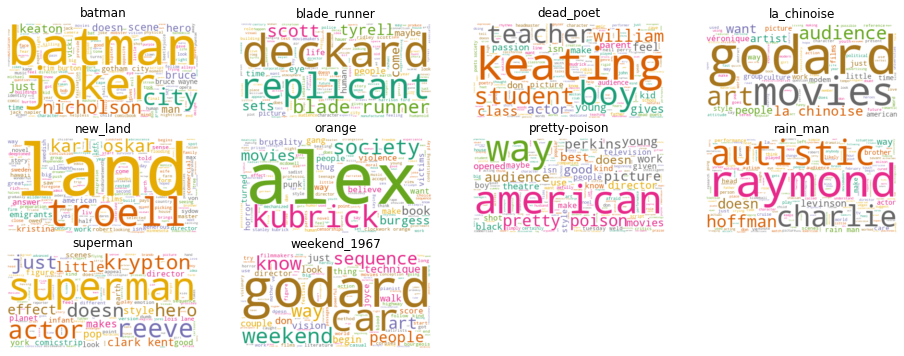

In [24]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]
movies=['batman','blade_runner','dead_poet','la_chinoise','new_land','orange','pretty-poison','rain_man','superman','weekend_1967']

# Create subplots for each comedian
for index, movie in enumerate(data.columns):
    wc.generate(data_clean.transcript[movie])#generate data cloud for each one 
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(movies[index])
    
plt.show()
# can be used to summarise the movie and what is about 

In [25]:
unique_list=[]
for movie in data.columns:
    uniques = data[movie].nonzero()[0].size
    unique_list.append(uniques)

data_words=pd.DataFrame(list((zip(movies,unique_list))),columns=['movies', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,movies,unique_words
4,new_land,285
6,pretty-poison,334
7,rain_man,516
2,dead_poet,524
9,weekend_1967,642
5,orange,719
0,batman,747
8,superman,766
3,la_chinoise,880
1,blade_runner,901


Text(0.5, 1.0, 'Number of Unique Words')

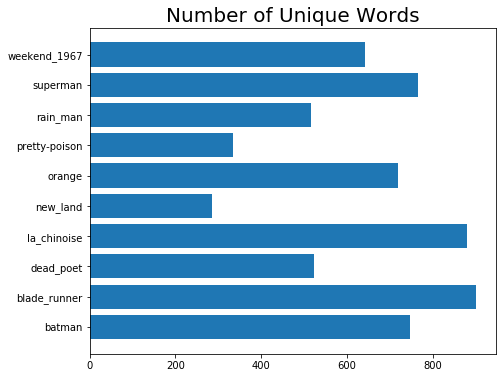

In [51]:
# drop the movie related words and generate word cloud
###
import numpy as np

y_pos = np.arange(len(data_words))
plt.subplot(1, 2, 1)
plt.barh(y_pos, data_words.unique_words, align='center')
plt.yticks(y_pos, movies)
plt.title('Number of Unique Words', fontsize=20)

    